# Exploración y análisis de los datos

Librerias empleadas

In [57]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
from collections import Counter
import math

import warnings
warnings.filterwarnings("ignore")

Carga de los datos

In [ ]:
df = pd.read_csv('')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Análisis de Estructura y Calidad

Tipos de datos y dimensiones del dataset:

La base de datos contiene 891 registros y cuenta con 12 columnas en total:

| Variable     | Definition                    | Key |
|--------------|-------------------------------|-----|
| **PassengerId**  | Identificador del pasajero     | Número único asignado a cada pasajero |
| **Survived**     | Supervivencia                  | 0 = No, 1 = Sí |
| **Pclass**       | Clase del ticket               | 1 = Primera, 2 = Segunda, 3 = Tercera |
| **Name**         | Nombre del pasajero            | Incluye título (Sr., Sra., etc.) |
| **Sex**          | Sexo                           | male = Hombre, female = Mujer |
| **Age**          | Edad en años                   | Dato númerico que mide la edad del pasajero |
| **SibSp**        | Hermanos / cónyuge a bordo     | Número de hermanos y/o cónyuge que viajaban |
| **Parch**        | Padres / hijos a bordo         | Número de padres y/o hijos que viajaban |
| **Ticket**       | Número de ticket               | Puede repetirse entre pasajeros |
| **Fare**         | Tarifa del pasajero            | Precio pagado por el boleto |
| **Cabin**        | Número de cabina               | Contiene el identificador de la cabina asignada |
| **Embarked**     | Puerto de embarque             | C = Cherbourg, Q = Queenstown, S = Southampton |


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Valores faltantes por variable:

In [60]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Faltantes': missing, '%': missing_percent})
missing_df[missing_df['Faltantes'] > 0]

,Faltantes,%
Age,177,19.865320
Cabin,687,77.104377
Embarked,2,0.224467


Valores atípicos o inconsistentes (outliers):

In [61]:
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} outliers")

PassengerId: 0 outliers
Survived: 0 outliers
Pclass: 0 outliers
Age: 11 outliers
SibSp: 46 outliers
Parch: 213 outliers
Fare: 116 outliers


### Estadística Descriptiva

Medidas de tendencia central y dispersión para variables numéricas:

In [62]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Tablas de frecuencia para variables categóricas:

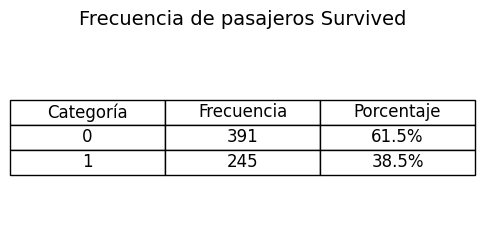

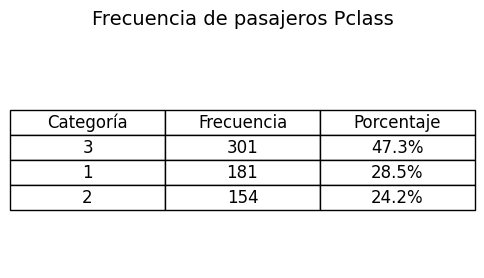

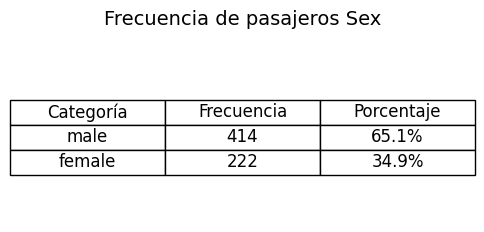

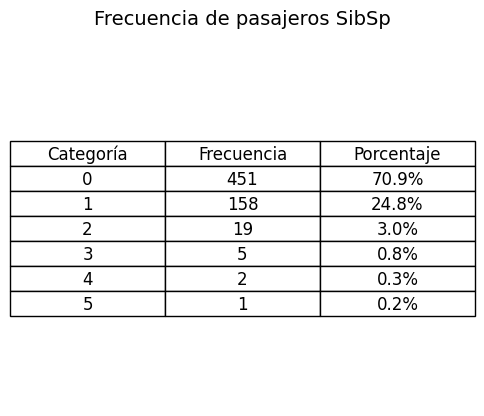

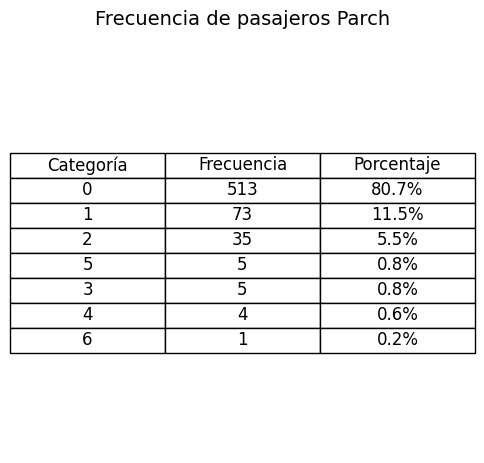

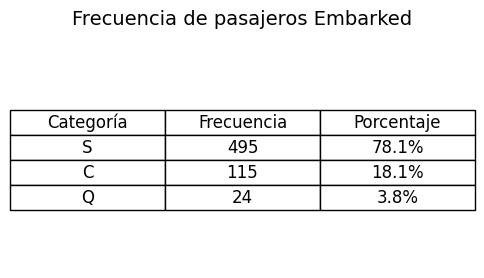

In [63]:
etiquetas  = df.keys()
data = df.to_numpy()
Estructura = []
dic = {}

for i in etiquetas:
    dic[i] = None

for passanger in data:
    dic_ = dic.copy()
    for i in range(len(etiquetas)):
        dic_[etiquetas[i]] = passanger[i]
    Estructura.append(dic_)

etiquetas_1 = list(etiquetas)  # convertir a lista
etiquetas_1.remove('PassengerId')
etiquetas_1.remove('Name')
etiquetas_1.remove('Ticket')
etiquetas_1.remove('Cabin')
etiquetas_1.remove('Age')
etiquetas_1.remove("Fare")

def tabla_frecuencia_visual(Estructura, variable, excluir_ninos=True, titulo=None):

    conteo = Counter()
    total = 0
    for pasajero in Estructura:
        edad = pasajero.get('Age')
        valor = pasajero.get(variable)

        if excluir_ninos and (edad is None or (isinstance(edad,float) and math.isnan(edad)) or edad < 15):
            continue

        if valor is None or (isinstance(valor,float) and math.isnan(valor)):
            continue

        conteo[valor] += 1
        total += 1

    if total == 0:
        print("No hay datos válidos para esta variable.")
        return

    items = sorted(conteo.items(), key=lambda x: x[1], reverse=True)

    filas = []
    for cat, freq in items:
        porcentaje = freq / total * 100
        filas.append([cat, freq, f"{porcentaje:.1f}%"])

    fig, ax = plt.subplots(figsize=(6, 0.6*len(filas)+1))
    ax.axis('tight')
    ax.axis('off')

    encabezado = ['Categoría', 'Frecuencia', 'Porcentaje']
    tabla = ax.table(cellText=filas, colLabels=encabezado, cellLoc='center', loc='center')
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(12)
    tabla.scale(1, 1.5)

    if titulo:
        plt.title(titulo, fontsize=14, pad=20)

    plt.show()


for i in etiquetas_1:
    tabla_frecuencia_visual(Estructura, i, titulo=f"Frecuencia de pasajeros {i}")

In [64]:
# Paleta
PALETA = ["#51A3A3", "#75485E", "#CB904D", "#DFCC74", "#C3E991"]
CMAP = ListedColormap(PALETA)

# Fuente y look & feel sin bordes
mpl.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.sans-serif": ["Helvetica", "DejaVu Sans", "Arial"],
    "axes.linewidth": 0.6,
    "legend.frameon": False,
})

def apply_no_spines(ax, left=True, bottom=True, right=True, top=True):
    """Oculta bordes del marco del gráfico."""
    if left:   ax.spines["left"].set_visible(False)
    if bottom: ax.spines["bottom"].set_visible(False)
    if right:  ax.spines["right"].set_visible(False)
    if top:    ax.spines["top"].set_visible(False)

def next_colors(n):
    """Devuelve n colores de la paleta, ciclando si hace falta."""
    rep = (n // len(PALETA)) + 1
    return (PALETA * rep)[:n]

def annotate_bars(ax, fmt="{:.0f}", offset=3):
    """Etiqueta cada barra con su valor (formato libre)."""
    for p in ax.patches:
        h = p.get_height()
        if not np.isfinite(h):
            continue
        ax.annotate(fmt.format(h),
                    (p.get_x() + p.get_width()/2, h),
                    ha="center", va="bottom",
                    xytext=(0, offset), textcoords="offset points")

def annotate_bars_with_pct(ax, total=None, fmt_count="{:.0f}", fmt_pct="{:.1f}%",
                           show_count=True, show_pct=True, sep="  |  ", offset=3):
    """
    Etiqueta barras con conteo y/o porcentaje del total.
    - total: si None, usa suma de alturas visibles.
    """
    if total is None:
        total = sum([p.get_height() for p in ax.patches if np.isfinite(p.get_height())])
    for p in ax.patches:
        h = p.get_height()
        if not np.isfinite(h):
            continue
        parts = []
        if show_count:
            parts.append(fmt_count.format(h))
        if show_pct and total > 0:
            parts.append(fmt_pct.format(100.0 * h / total))
        if parts:
            ax.annotate(sep.join(parts),
                        (p.get_x() + p.get_width()/2, h),
                        ha="center", va="bottom",
                        xytext=(0, offset), textcoords="offset points")

def annotate_grouped_bars_pct(ax, n_series, x_totals,
                              fmt_count="{:.2f}", fmt_pct="{:.1f}%",
                              show_count=True, show_pct=True, sep="  |  ", offset=3):
    """
    Para barras agrupadas (DataFrame.plot(kind='bar')).
    Etiqueta cada barra con su valor y su % respecto al total de su grupo (categoría en X).
    """
    patches = [p for p in ax.patches if np.isfinite(p.get_height())]
    for i, p in enumerate(patches):
        h = p.get_height()
        x_idx = i // n_series
        total = float(x_totals[x_idx]) if x_totals[x_idx] is not None else None
        parts = []
        if show_count:
            parts.append(fmt_count.format(h))
        if show_pct and total and total != 0:
            parts.append(fmt_pct.format(100.0 * h / total))
        if parts:
            ax.annotate(sep.join(parts),
                        (p.get_x() + p.get_width()/2, h),
                        ha="center", va="bottom",
                        xytext=(0, offset), textcoords="offset points")

def preparar_df(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    cols_req = ["Survived","Sex","Pclass","Age","Embarked","Fare","SibSp","Parch"]
    faltan = [c for c in cols_req if c not in df.columns]
    if faltan:
        raise ValueError(f"Faltan columnas requeridas: {faltan}")

    # Coerciones numéricas
    num_cols = ["Survived","Pclass","Age","Fare","SibSp","Parch"]
    for c in num_cols:
        df[c] = pd.to_numeric(df[c], errors="coerce")

    # Derivadas: grupos de edad + tamaño de familia
    bins_edad = [0, 12, 18, 30, 45, 60, np.inf]
    labels_edad = ["0-12", "13-18", "19-30", "31-45", "46-60", "60+"]
    df["AgeGroup"] = pd.cut(df["Age"], bins=bins_edad, labels=labels_edad, include_lowest=True)

    df["FamilySize"] = df[["SibSp","Parch"]].sum(axis=1) + 1
    df["FamilyCat"] = pd.cut(df["FamilySize"], bins=[0,1,2,4,7,20], labels=["1","2","3-4","5-7","8+"])

    # Limpieza de Embarked
    df["Embarked"] = df["Embarked"].astype(str).str.strip().replace({"nan": np.nan})
    return df

def tasa_supervivencia_por(grupo):
    return grupo["Survived"].mean()

def _add_caption(fig, text):
    fig.subplots_adjust(bottom=0.15)
    fig.text(0.5, 0.02, text, ha='center', va='center', fontsize=9)

def barra_agrupada_from_pivot(pv, title, ylabel, caption, xlabel_rot=0,
                              show_group_pct=False, value_fmt=None):
    """
    Barra agrupada con tu paleta y sin bordes.
    - show_group_pct=True: etiqueta valor + % dentro de cada categoría X.
    - value_fmt: formato del valor (p.ej. '{:.1%}' para tasas).
    """
    ax = pv.plot(kind="bar",
                 color=next_colors(pv.shape[1]),
                 edgecolor="none")
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel("")
    plt.xticks(rotation=xlabel_rot)

    if value_fmt is None:
        value_fmt = "{:.2f}" if np.issubdtype(pv.values.dtype, np.floating) else "{:.0f}"

    if show_group_pct:
        x_totals = pv.sum(axis=1).values
        annotate_grouped_bars_pct(ax,
                                  n_series=pv.shape[1],
                                  x_totals=x_totals,
                                  fmt_count=value_fmt,
                                  fmt_pct="{:.1f}%",
                                  show_count=True, show_pct=True)
    else:
        annotate_bars(ax, fmt=value_fmt)

    apply_no_spines(ax, left=True, bottom=False, right=True, top=True)
    fig = ax.get_figure()
    _add_caption(fig, caption)
    plt.tight_layout()
    plt.show()

def heatmap_from_table(table, title, xtitle="", ytitle="", caption=""):
    fig, ax = plt.subplots()
    im = ax.imshow(table.values, aspect="auto", cmap=CMAP)
    ax.set_title(title)
    ax.set_xticks(range(table.shape[1]))
    ax.set_yticks(range(table.shape[0]))
    ax.set_xticklabels(table.columns)
    ax.set_yticklabels(table.index)
    # etiquetas en celdas
    for i in range(table.shape[0]):
        for j in range(table.shape[1]):
            val = table.values[i, j]
            txt = f"{val:.2f}" if isinstance(val, (float, np.floating)) else f"{val}"
            ax.text(j, i, txt, ha="center", va="center", fontsize=9)
    ax.set_xlabel(xtitle)
    ax.set_ylabel(ytitle)
    fig.colorbar(im, ax=ax)
    _add_caption(fig, caption)
    plt.tight_layout()
    plt.show()

# 1.3 Visualización Univariada (≥6)
def run_univariado(df: pd.DataFrame, log_fare_boxplot=False):
    df = preparar_df(df)

    # 1) Histograma Age + densidad
    fig, ax = plt.subplots()
    age = df["Age"].dropna()
    ax.hist(age, bins=25, density=True, alpha=0.8, color=PALETA[0], edgecolor="none")
    try:
        from scipy.stats import gaussian_kde
        kde = gaussian_kde(age)
        xs = np.linspace(age.min(), age.max(), 200)
        ax.plot(xs, kde(xs), linewidth=2, color=PALETA[1])
    except Exception:
        mu, sigma = age.mean(), age.std(ddof=0)
        xs = np.linspace(age.min(), age.max(), 200)
        pdf = (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-0.5*((xs-mu)/sigma)**2)
        ax.plot(xs, pdf, linewidth=2, color=PALETA[1])
    ax.set_title("Distribución de Edad (histograma + densidad)")
    ax.set_xlabel("Edad"); ax.set_ylabel("Densidad")
    apply_no_spines(ax, left=True, bottom=False, right=True, top=True)
    _add_caption(fig, "Punto 1.3.1: Distribución de edad (histograma con curva de densidad).")
    plt.tight_layout(); plt.show()

    # 2) Histograma Fare con escala logarítmica en X
    fig, ax = plt.subplots(figsize=(8,5))
    fare = df["Fare"].dropna()
    eps = 1e-3  # para evitar log(0)
    ax.hist(fare + eps, bins=30, color=PALETA[2], edgecolor="none", alpha=0.9)
    ax.set_xscale("log")
    ax.set_title("Distribución de Tarifa (Fare) con escala log en X")
    ax.set_xlabel("Fare (log)"); ax.set_ylabel("Frecuencia")
    apply_no_spines(ax, left=False, bottom=False, right=True, top=True)
    _add_caption(fig, "Punto 1.3.2: Distribución de tarifa pagada (escala logarítmica).")
    plt.tight_layout(); plt.show()

    # 3) Barras: Sex (conteo + porcentaje)
    counts_sex = df["Sex"].dropna().value_counts()
    ax = counts_sex.plot(kind="bar",
                         color=next_colors(len(counts_sex)),
                         edgecolor="none")
    ax.set_title("Frecuencia por Sexo")
    ax.set_xlabel("Sexo"); ax.set_ylabel("Conteo")
    annotate_bars_with_pct(ax, total=counts_sex.sum(), fmt_count="{:.0f}", fmt_pct="{:.1f}%")
    apply_no_spines(ax, left=True, bottom=False, right=True, top=True)
    fig = ax.get_figure()
    _add_caption(fig, "Punto 1.3.3: Gráfico de barras para variable categórica (Sex).")
    plt.tight_layout(); plt.show()

    # 4) Barras: Pclass (conteo + porcentaje)
    counts_pclass = df["Pclass"].dropna().astype(int).value_counts().sort_index()
    ax = counts_pclass.plot(kind="bar",
                            color=next_colors(len(counts_pclass)),
                            edgecolor="none")
    ax.set_title("Frecuencia por Clase (Pclass)")
    ax.set_xlabel("Clase"); ax.set_ylabel("Conteo")
    annotate_bars_with_pct(ax, total=counts_pclass.sum(), fmt_count="{:.0f}", fmt_pct="{:.1f}%")
    apply_no_spines(ax, left=True, bottom=False, right=True, top=True)
    fig = ax.get_figure()
    _add_caption(fig, "Punto 1.3.3: Gráfico de barras para variable categórica (Pclass).")
    plt.tight_layout(); plt.show()

    # 5) Barras: Embarked (conteo + porcentaje)
    counts_emb = df["Embarked"].dropna().value_counts()
    ax = counts_emb.plot(kind="bar",
                         color=next_colors(len(counts_emb)),
                         edgecolor="none")
    ax.set_title("Frecuencia por Puerto de Embarque (Embarked)")
    ax.set_xlabel("Puerto"); ax.set_ylabel("Conteo")
    annotate_bars_with_pct(ax, total=counts_emb.sum(), fmt_count="{:.0f}", fmt_pct="{:.1f}%")
    apply_no_spines(ax, left=True, bottom=False, right=True, top=True)
    fig = ax.get_figure()
    _add_caption(fig, "Punto 1.3.3: Gráfico de barras para variable categórica (Embarked).")
    plt.tight_layout(); plt.show()

    # 6) Boxplot Age (coloreado, sin borde)
    fig, ax = plt.subplots()
    ax.boxplot(df["Age"].dropna(), patch_artist=True,
               boxprops=dict(facecolor=PALETA[3], color="none"))
    ax.set_title("Boxplot de Edad"); ax.set_ylabel("Edad")
    _add_caption(fig, "Punto 1.3.4: Box plot para identificar outliers (Age).")
    plt.tight_layout(); plt.show()

    # 7) Boxplot Fare (log opcional, coloreado, sin borde)
    fig, ax = plt.subplots()
    ax.boxplot(fare, patch_artist=True,
               boxprops=dict(facecolor=PALETA[4], color="none"))
    if log_fare_boxplot:
        ax.set_yscale("log")
    ax.set_title("Boxplot de Tarifa (Fare)"); ax.set_ylabel("Fare")
    _add_caption(fig, "Punto 1.3.4: Box plot para identificar outliers (Fare).")
    plt.tight_layout(); plt.show()

# 1.4 Bivariado y Multivariado (≥8)
def run_bivariado_multivariado(df: pd.DataFrame):
    df = preparar_df(df)

    # 1) Supervivencia por género y clase (barras agrupadas; muestra la tasa como %)
    grp1 = df.dropna(subset=["Sex","Pclass"]).groupby(["Sex","Pclass"]).apply(tasa_supervivencia_por)
    pv1 = grp1.unstack("Pclass")
    barra_agrupada_from_pivot(
        pv1,
        "Tasa de Supervivencia por Género y Clase",
        "Tasa de Supervivencia",
        caption="Punto 1.4.1: Supervivencia por género y clase.",
        xlabel_rot=0,
        show_group_pct=False,     # aquí no tiene sentido % dentro del grupo; mostramos solo el valor
        value_fmt="{:.1%}"        # formato porcentaje (mean de supervivencia)
    )

    # 2) Supervivencia por grupos etarios (barras simples; tasa como %)
    grp2 = df.dropna(subset=["AgeGroup"]).groupby("AgeGroup").apply(tasa_supervivencia_por)
    ax = grp2.plot(kind="bar",
                   color=next_colors(len(grp2)),
                   edgecolor="none")
    ax.set_title("Tasa de Supervivencia por Grupo de Edad")
    ax.set_ylabel("Tasa de Supervivencia"); ax.set_xlabel("Grupo de Edad")
    annotate_bars(ax, fmt="{:.1%}")
    apply_no_spines(ax, left=True, bottom=False, right=True, top=True)
    fig = ax.get_figure()
    _add_caption(fig, "Punto 1.4.2: Supervivencia por edad (grupos etarios).")
    plt.tight_layout(); plt.show()

    # 3) Matriz de correlación (heatmap con tu cmap)
    num_cols = ["Survived","Pclass","Age","Fare","SibSp","Parch","FamilySize"]
    corr = df[num_cols].corr()
    heatmap_from_table(
        corr,
        "Matriz de Correlación (Variables Numéricas)",
        xtitle="Variables", ytitle="Variables",
        caption="Punto 1.4.3: Matriz de correlación entre variables numéricas."
    )

    # 4) Supervivencia por puerto de embarque (tasa como %)
    grp4 = df.dropna(subset=["Embarked"]).groupby("Embarked").apply(tasa_supervivencia_por).sort_values(ascending=False)
    ax = grp4.plot(kind="bar",
                   color=next_colors(len(grp4)),
                   edgecolor="none")
    ax.set_title("Tasa de Supervivencia por Puerto de Embarque")
    ax.set_ylabel("Tasa de Supervivencia"); ax.set_xlabel("Puerto")
    annotate_bars(ax, fmt="{:.1%}")
    apply_no_spines(ax, left=True, bottom=False, right=True, top=True)
    fig = ax.get_figure()
    _add_caption(fig, "Punto 1.4.4: Supervivencia por puerto de embarque.")
    plt.tight_layout(); plt.show()

    # 5) Tarifa por clase (boxplot por grupos)
    dat = [df.loc[df["Pclass"]==k, "Fare"].dropna() for k in sorted(df["Pclass"].dropna().unique())]
    fig, ax = plt.subplots()
    ax.boxplot(dat, labels=[str(k) for k in sorted(df["Pclass"].dropna().unique())],
               patch_artist=True,
               boxprops=dict(color="none"),
               medianprops=dict(color="#333333"))
    # Colorea cada caja con la paleta
    for patch, col in zip(ax.artists, next_colors(len(dat))):
        patch.set_facecolor(col)
    ax.set_title("Distribución de Tarifa (Fare) por Clase")
    ax.set_ylabel("Fare"); ax.set_xlabel("Clase")
    _add_caption(fig, "Punto 1.4.5: Análisis de tarifa por clase (box plots).")
    plt.tight_layout(); plt.show()

    # 6) Supervivencia por tamaño de familia (tasa como %)
    grp6 = df.dropna(subset=["FamilyCat"]).groupby("FamilyCat").apply(tasa_supervivencia_por)
    ax = grp6.plot(kind="bar",
                   color=next_colors(len(grp6)),
                   edgecolor="none")
    ax.set_title("Tasa de Supervivencia por Tamaño de Familia")
    ax.set_ylabel("Tasa de Supervivencia"); ax.set_xlabel("Tamaño de Familia (Categoría)")
    annotate_bars(ax, fmt="{:.1%}")
    apply_no_spines(ax, left=True, bottom=False, right=True, top=True)
    fig = ax.get_figure()
    _add_caption(fig, "Punto 1.4.6: Supervivencia por tamaño de familia.")
    plt.tight_layout(); plt.show()

    # 7) Heatmap Pclass vs Survived (tasa por clase)
    tbl7 = df.groupby("Pclass")["Survived"].mean().to_frame().T
    heatmap_from_table(
        tbl7,
        "Tasa de Supervivencia por Clase (Heatmap)",
        xtitle="Clase", ytitle="",
        caption="Punto 1.4.7: Heatmap de relación categórica Pclass–Survived."
    )

    # 8) Heatmap Sex vs Survived (tasa por sexo)
    tbl8 = df.groupby("Sex")["Survived"].mean().to_frame().T
    heatmap_from_table(
        tbl8,
        "Tasa de Supervivencia por Sexo (Heatmap)",
        xtitle="Sexo", ytitle="",
        caption="Punto 1.4.7: Heatmap de relación categórica Sex–Survived."
    )

    # 9) Distribución de Age por Survived (histogramas superpuestos)
    fig, ax = plt.subplots()
    survived_age   = df.loc[df["Survived"]==1, "Age"].dropna()
    not_surv_age   = df.loc[df["Survived"]==0, "Age"].dropna()
    ax.hist(survived_age, bins=20, alpha=0.55, label="Sobrevivió",   color=PALETA[0], edgecolor="none")
    ax.hist(not_surv_age, bins=20, alpha=0.55, label="No sobrevivió", color=PALETA[1], edgecolor="none")
    ax.set_title("Distribución de Edad por Supervivencia")
    ax.set_xlabel("Edad"); ax.set_ylabel("Frecuencia")
    ax.legend()
    _add_caption(fig, "Punto 1.4.8: Relación edad–supervivencia (distribuciones comparadas).")
    plt.tight_layout(); plt.show()

    # 10) Fare promedio por Pclass x Survived (barras agrupadas; valor con 2 decimales)
    grp10 = df.dropna(subset=["Pclass","Survived"]).groupby(["Pclass","Survived"])["Fare"].mean()
    pv10 = grp10.unstack("Survived")
    barra_agrupada_from_pivot(
        pv10,
        "Tarifa Promedio por Clase y Supervivencia",
        "Tarifa Promedio",
        caption="Punto 1.4.5: Tarifa promedio por clase y supervivencia (barras agrupadas).",
        xlabel_rot=0,
        show_group_pct=False,
        value_fmt="{:.2f}"
    )

def heatmap_supervivencia_por_clase(Estructura):
    clases = [1, 2, 3]
    tabla = {clase: {0:0, 1:0} for clase in clases}

    for pasajero in Estructura:
        clase = pasajero['Pclass']
        survived = pasajero['Survived']
        tabla[clase][survived] += 1

    data = np.array([[tabla[c][0], tabla[c][1]] for c in clases])

    plt.figure(figsize=(10,6))
    plt.imshow(data, cmap='YlGnBu')
    plt.colorbar(label='Número de pasajeros')
    plt.xticks([0,1], ['No sobrevivió','Sobrevivió'])
    plt.yticks([0,1,2], ['1ª clase','2ª clase','3ª clase'])
    plt.title("Supervivencia por clase")

    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            plt.text(j, i, str(data[i,j]), ha='center', va='center', color='black')

    plt.show()

Análisis de la variable de interés ('Survived').

In [65]:
print('Tasa de supervivencia general: ', round(df['Survived'].mean() * 100,2), '%')

Tasa de supervivencia general:  38.38 %


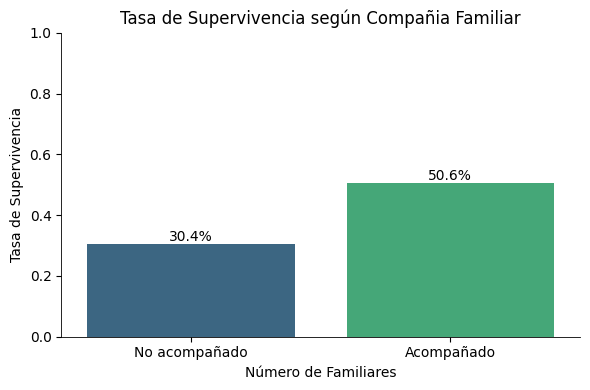

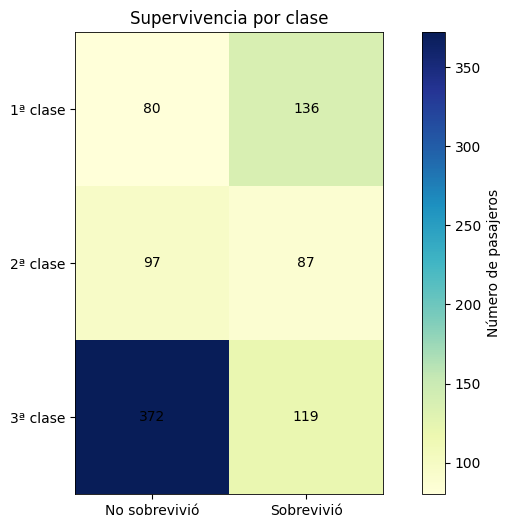

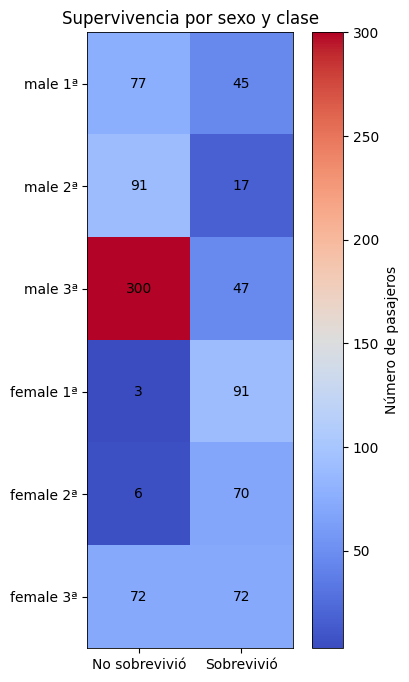

In [66]:
1# 1. Heatmap de supervivencia por sexo y clase
def heatmap_supervivencia_por_sexo_clase(Estructura):
    clases = [1, 2, 3]
    sexos = ['male', 'female']
    tabla = {s:{c:{0:0,1:0} for c in clases} for s in sexos}

    for pasajero in Estructura:
        s = pasajero['Sex']
        c = pasajero['Pclass']
        surv = pasajero['Survived']
        tabla[s][c][surv] += 1

    data = []
    labels = []
    for s in sexos:
        for c in clases:
            data.append([tabla[s][c][0], tabla[s][c][1]])
            labels.append(f"{s} {c}ª")

    data = np.array(data)

    plt.figure(figsize=(5,8))
    plt.imshow(data, cmap='coolwarm')
    plt.colorbar(label='Número de pasajeros')
    plt.xticks([0,1], ['No sobrevivió','Sobrevivió'])
    plt.yticks(np.arange(len(labels)), labels)
    plt.title("Supervivencia por sexo y clase")

    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            plt.text(j, i, str(data[i,j]), ha='center', va='center', color='black')

    plt.show()

# 2. Crear variable binaria 'Acompañado'
df['Acompañado'] = (df['SibSp'] + df['Parch']) > 0

# 3. Agrupar por 'Acompañado' y calcular tasas de supervivencia
tasa_por_grupo = df.groupby('Acompañado')['Survived'].mean().reset_index()
tasa_por_grupo['Acompañado'] = tasa_por_grupo['Acompañado'].map({True: 'Acompañado', False: 'No acompañado'})

# 4. Gráfico de barras
plt.figure(figsize=(6,4))
ax = sns.barplot(data=tasa_por_grupo, x='Acompañado', y='Survived',
                 palette='viridis', edgecolor="none")

# Títulos y ejes
ax.set_title('Tasa de Supervivencia según Compañia Familiar', fontsize=12, fontname="DejaVu Sans")
ax.set_ylabel('Tasa de Supervivencia', fontname="DejaVu Sans")
ax.set_xlabel('Número de Familiares', fontname="DejaVu Sans")
ax.set_ylim(0, 1)

# Agregar porcentajes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.1%}",
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom', fontsize=10, fontname="DejaVu Sans")

sns.despine()
plt.tight_layout()
plt.show()

heatmap_supervivencia_por_clase(Estructura)
heatmap_supervivencia_por_sexo_clase(Estructura)

### Visualización Univariada

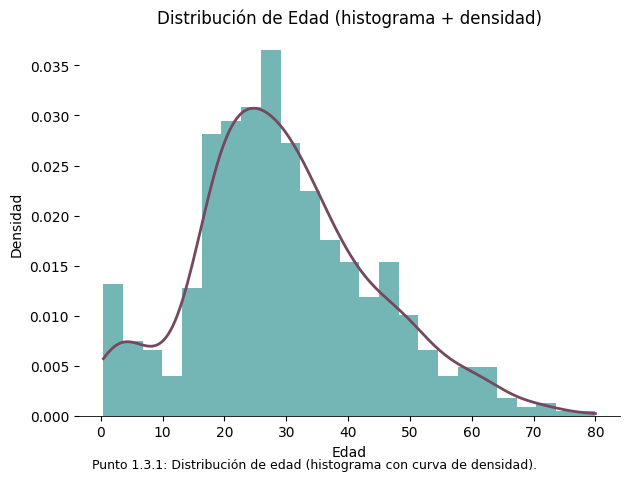

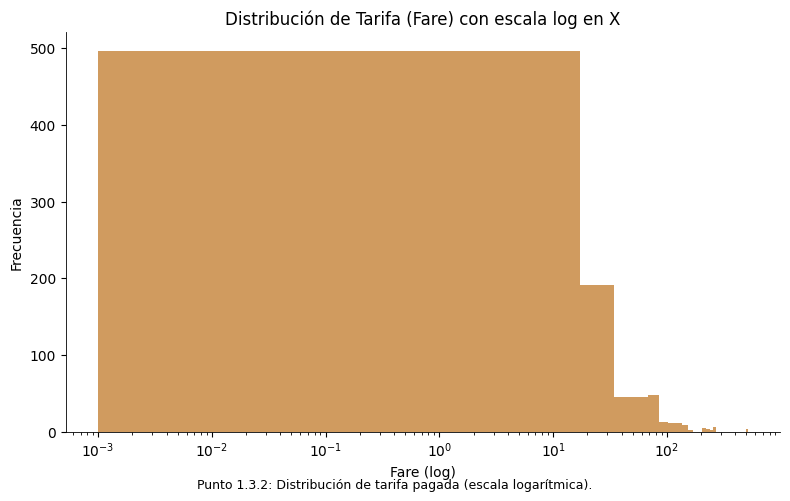

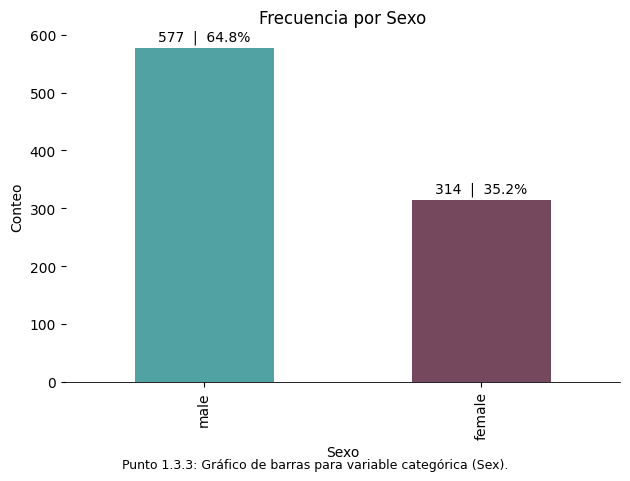

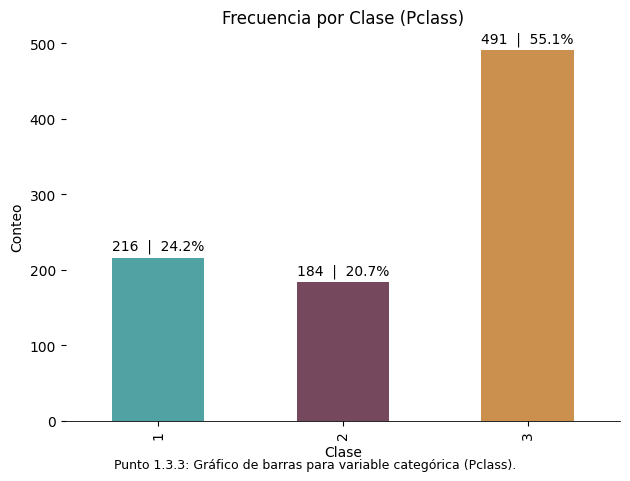

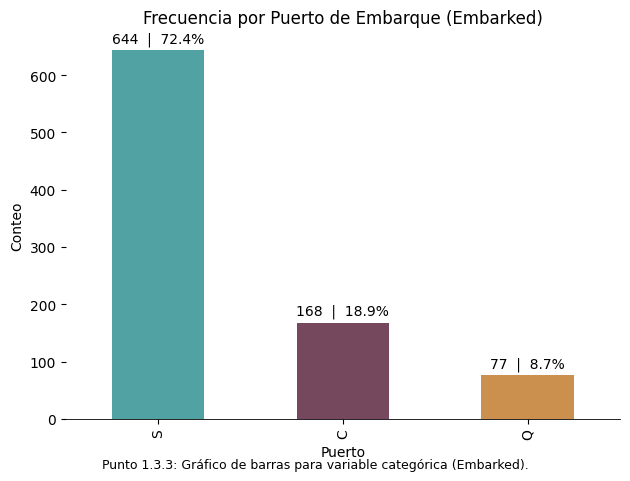

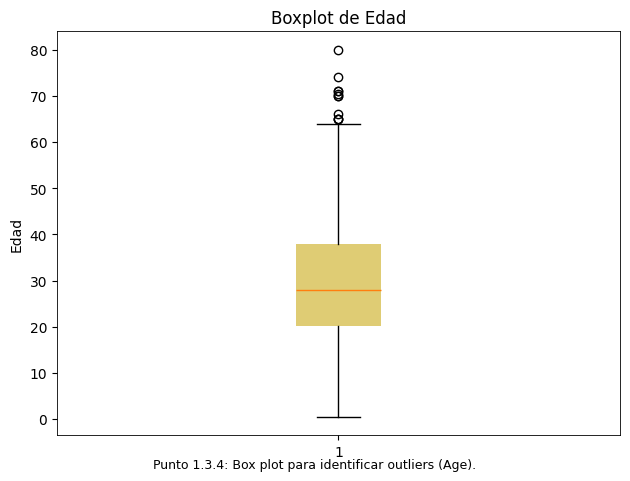

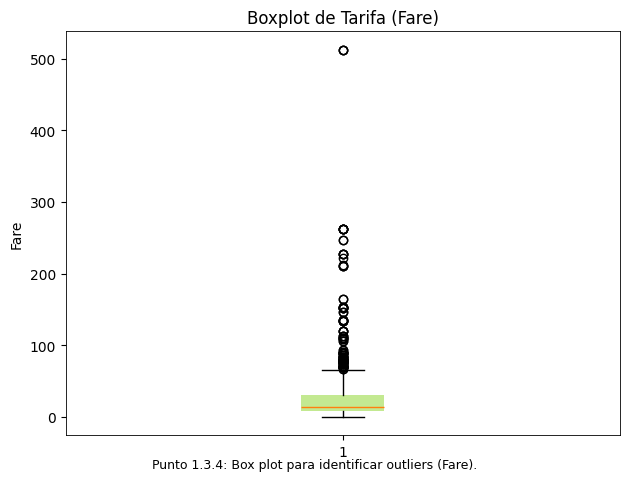

In [67]:
run_univariado(df)

### Análisis Bivariado y Multivariado

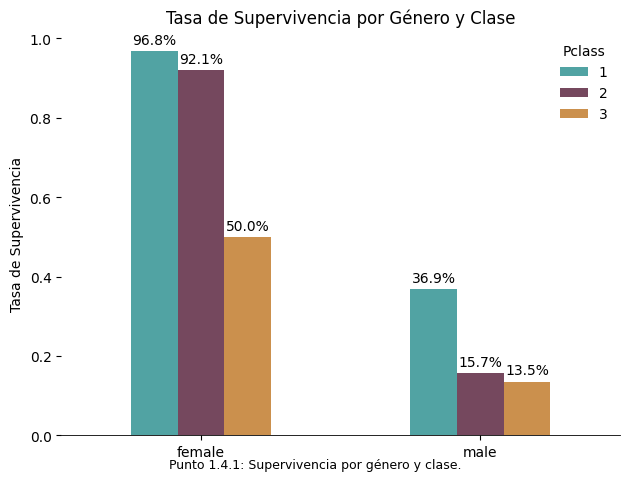

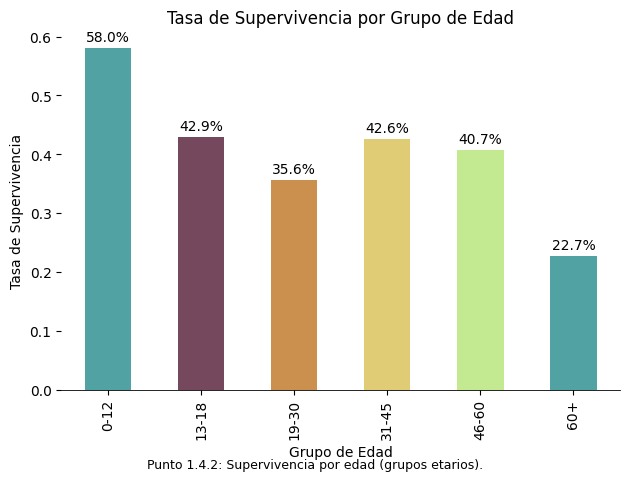

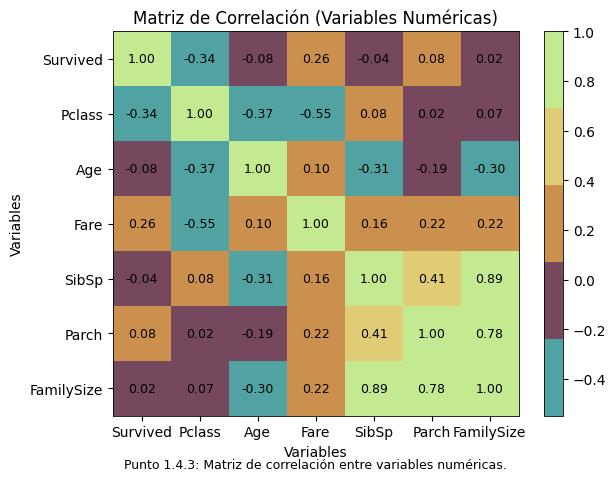

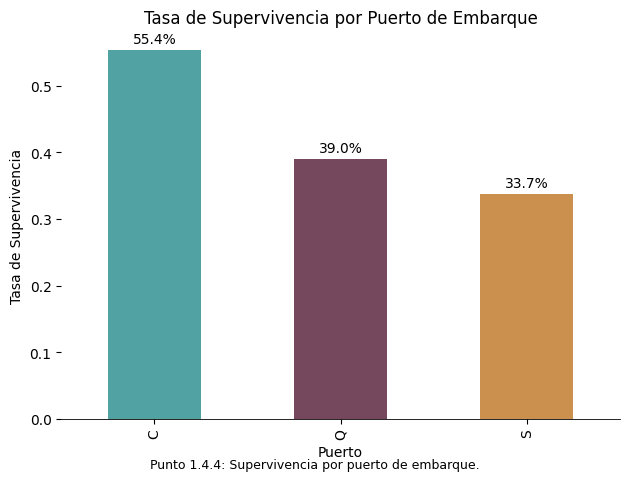

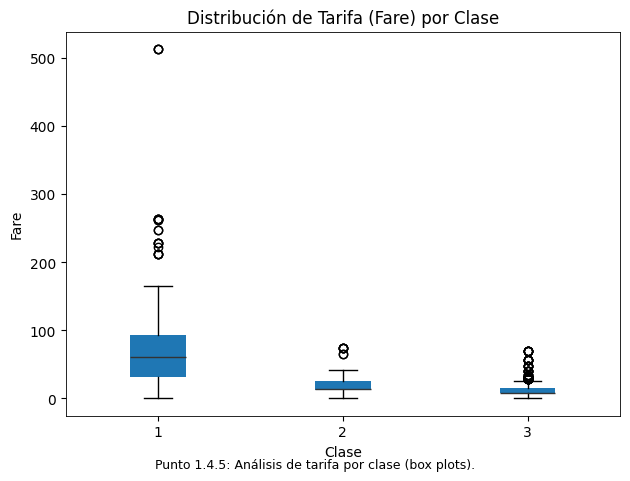

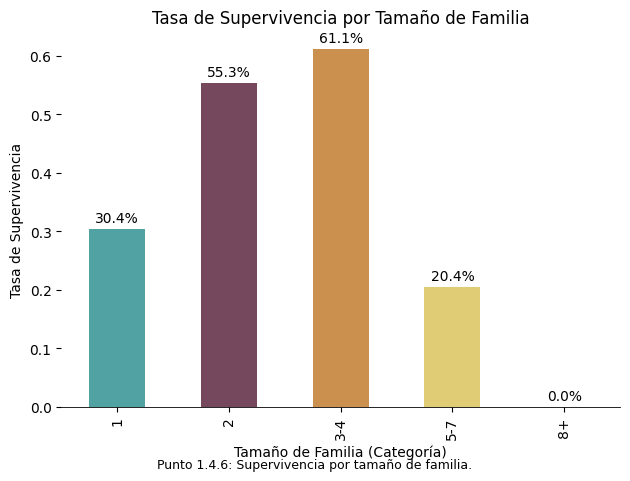

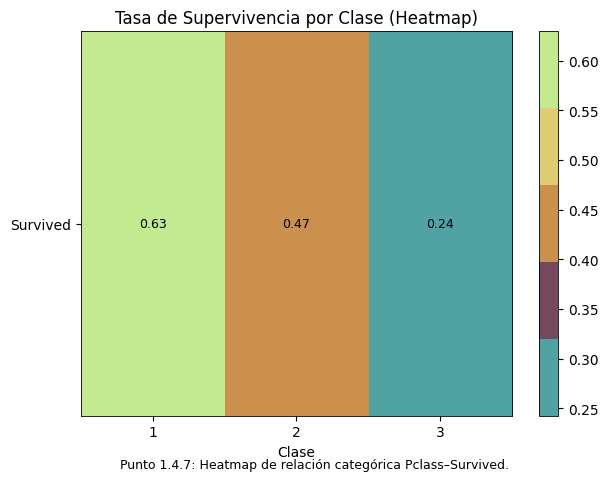

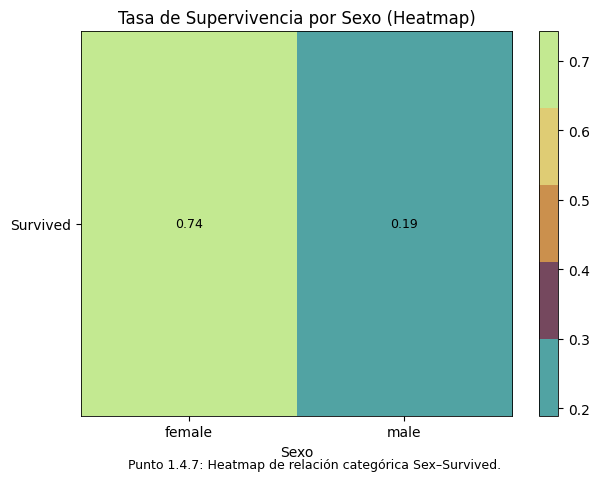

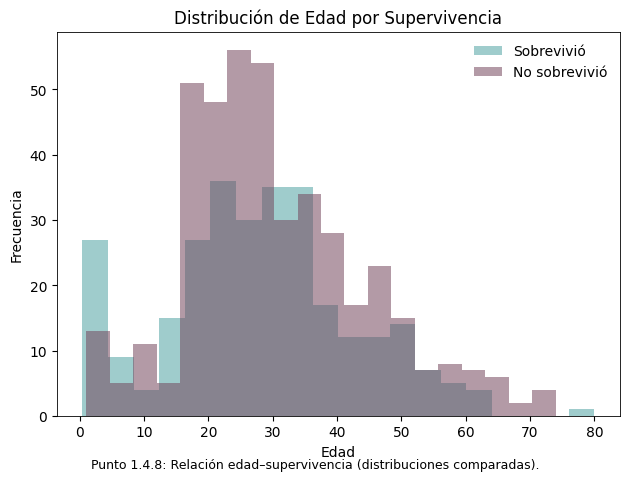

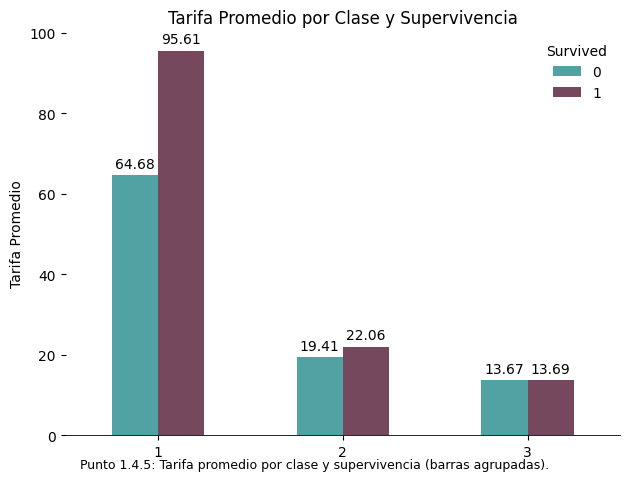

In [68]:
run_bivariado_multivariado(df)

### Análisis de Valores Faltantes

In [69]:
# Totales
totales_prim = df[df['Pclass'] == 1].shape[0]
totales_seg = df[df['Pclass'] == 2].shape[0]
totales_ter = df[df['Pclass'] == 3].shape[0]
totales_C = df[df['Embarked'] == 'C'].shape[0]
totales_Q = df[df['Embarked'] == 'Q'].shape[0]
totales_S = df[df['Embarked'] == 'S'].shape[0]
totales_male = df[df['Sex'] == 'male'].shape[0]
totales_female = df[df['Sex'] == 'female'].shape[0]

# Porcentaje de Edades faltantes
e_f_prim = df[(df['Pclass'] == 1) & (df['Age'].isna())].shape[0] / totales_prim
e_f_seg = df[(df['Pclass'] == 2) & (df['Age'].isna())].shape[0] / totales_seg
e_f_ter = df[(df['Pclass'] == 3)  & df['Age'].isna()].shape[0] / totales_ter
e_f_C = df[(df['Embarked'] == 'C') & df['Age'].isna()].shape[0] / totales_C
e_f_Q = df[(df['Embarked'] == 'Q') & df['Age'].isna()].shape[0] / totales_Q
e_f_S = df[(df['Embarked'] == 'S') & df['Age'].isna()].shape[0] / totales_S
e_f_male = df[(df['Sex'] == 'male') & df['Age'].isna()].shape[0] / totales_male
e_f_female = df[(df['Sex'] == 'female') & df['Age'].isna()].shape[0] / totales_female

# Porcentaje de Cabinas faltantes
c_f_prim = df[(df['Pclass'] == 1) & df['Cabin'].isna()].shape[0] / totales_prim
c_f_seg = df[(df['Pclass'] == 2) & df['Cabin'].isna()].shape[0] / totales_seg
c_f_ter = df[(df['Pclass'] == 3)  & df['Cabin'].isna()].shape[0] / totales_ter
c_f_C = df[(df['Embarked'] == 'C') & df['Cabin'].isna()].shape[0] / totales_C
c_f_Q = df[(df['Embarked'] == 'Q') & df['Cabin'].isna()].shape[0] / totales_Q
c_f_S = df[(df['Embarked'] == 'S') & df['Cabin'].isna()].shape[0] / totales_S
c_f_male = df[(df['Sex'] == 'male') & df['Cabin'].isna()].shape[0] / totales_male
c_f_female = df[(df['Sex'] == 'female') & df['Cabin'].isna()].shape[0] / totales_female

# Porcentaje de Embarque faltante
emb_f_prim = df[(df['Pclass'] == 1) & df['Embarked'].isna()].shape[0] / totales_prim
emb_f_seg = df[(df['Pclass'] == 2) & df['Embarked'].isna()].shape[0] / totales_seg
emb_f_ter = df[(df['Pclass'] == 3)  & df['Embarked'].isna()].shape[0] / totales_ter
emb_f_C = df[(df['Embarked'] == 'C') & df['Embarked'].isna()].shape[0] / totales_C
emb_f_Q = df[(df['Embarked'] == 'Q') & df['Embarked'].isna()].shape[0] / totales_Q
emb_f_S = df[(df['Embarked'] == 'S') & df['Embarked'].isna()].shape[0] / totales_S
emb_f_male = df[(df['Sex'] == 'male') & df['Embarked'].isna()].shape[0] / totales_male
emb_f_female = df[(df['Sex'] == 'female') & df['Embarked'].isna()].shape[0] / totales_female

missing = pd.DataFrame({
    '1': [e_f_prim, c_f_prim, emb_f_prim],
    '2': [e_f_seg, c_f_seg, emb_f_seg],
    '3': [e_f_ter, c_f_ter, emb_f_ter],
    'C': [e_f_C, c_f_C, emb_f_C],
    'Q': [e_f_Q, c_f_Q, emb_f_Q],
    'S': [e_f_S, c_f_S, emb_f_S],
    'male': [e_f_male, c_f_male, emb_f_male],
    'female': [e_f_female, c_f_female, emb_f_female]})
missing.index = ['Edad', 'Cabina', 'Embarque']
print('Porcentaje de Valores Faltantes por Variable:')
missing*100

Porcentaje de Valores Faltantes por Variable:


,1,2,3,C,Q,S,male,female
Edad,13.888889,5.978261,27.698574,22.619048,63.636364,13.975155,21.490468,16.878981
Cabina,18.518519,91.304348,97.556008,58.928571,94.805195,79.968944,81.455806,69.108280
Embarque,0.925926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.636943


<Figure size 1000x600 with 0 Axes>

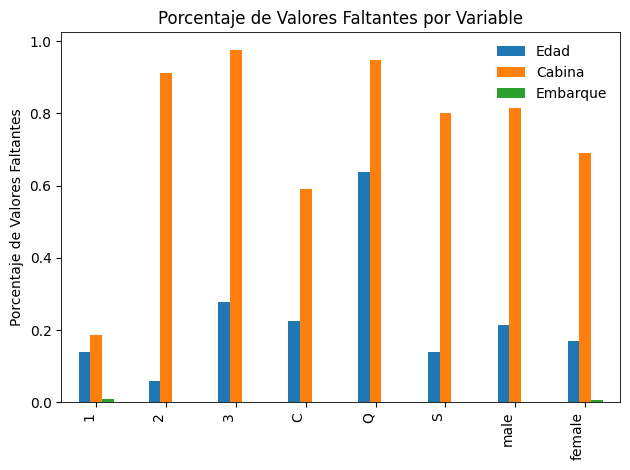

In [70]:
plt.figure(figsize=(10, 6))
missing.T.plot(kind='bar')
plt.title('Porcentaje de Valores Faltantes por Variable')
plt.ylabel('Porcentaje de Valores Faltantes')
plt.xticks(ha='right')
plt.tight_layout()
plt.show()